In [1]:
import os
import sys
from pathlib import Path

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import re
from typing import *
from helper import to_sequences, to_padding

# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer

### 1.Reading the data

In [2]:
# Define the lyrics of the song
data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# Split the long string per line and put in a list
corpus = data.lower().split("\n")

# Preview the result
print(corpus[:3])

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ']


### 2.Cleaning the Data

* All words are converted to Lower case

In [3]:
MAX_LENGTH = 0
lens = []

for each_sentence in corpus:

    temp_len = len(each_sentence)
    lens.append(temp_len)

    if MAX_LENGTH<temp_len:
        MAX_LENGTH = temp_len


print(MAX_LENGTH, np.mean(lens))

56 43.453125


In [4]:
max([len(x) for x in corpus])

56

### 4.Preprocessing --> Tokenization, Sequences and Padding

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# Vocabulary size of the tokenizer
VOCAB_SIZE = 10000

# Output dimensions of the Embedding layer
EMBEDDING_DIM = 64

# Parameters for padding and OOV tokens
TRUNC_TYPE = 'pre'
PADDING_TYPE = 'pre'
OOV_TOKEN = "<OOV>"

In [8]:
def get_tokenizer(VOCAB_SIZE, OOV_TOKEN, X_data=corpus):
    # Initialize the Tokenizer class
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)

    # Generate the word index dictionary
    tokenizer.fit_on_texts(X_data)
    
    return tokenizer

def to_sequences_n_padding(tokenizer,MAX_LENGTH,PADDING_TYPE,TRUNC_TYPE,X_data):
    # Generate and pad the training sequences
    _sequences = tokenizer.texts_to_sequences(X_data)
    _padded = pad_sequences(_sequences, 
                            maxlen=MAX_LENGTH, 
                            padding=PADDING_TYPE, 
                            truncating=TRUNC_TYPE)
    
    return _padded   


def seq_gen(sent_seq):
    input_seq = []
    for line in sent_seq:
        for i in range(1, len(line)):
            input_seq.append(line[:i+1])

    return input_seq

In [9]:
tokenizer = get_tokenizer(VOCAB_SIZE=VOCAB_SIZE,OOV_TOKEN=OOV_TOKEN)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'<OOV>': 1, 'and': 2, 'the': 3, 'a': 4, 'in': 5, 'all': 6, 'i': 7, 'for': 8, 'of': 9, 'lanigans': 10, 'ball': 11, 'were': 12, 'at': 13, 'to': 14, 'she': 15, 'stepped': 16, 'his': 17, 'girls': 18, 'as': 19, 'they': 20, 'til': 21, 'he': 22, 'again': 23, 'got': 24, 'boys': 25, 'round': 26, 'that': 27, 'her': 28, 'there': 29, 'three': 30, 'weeks': 31, 'up': 32, 'out': 33, 'him': 34, 'was': 35, 'spent': 36, 'learning': 37, 'new': 38, 'steps': 39, 'long': 40, 'away': 41, 'left': 42, 'friends': 43, 'relations': 44, 'when': 45, 'wall': 46, 'myself': 47, 'nice': 48, 'just': 49, 'dancing': 50, 'merry': 51, 'tipped': 52, 'me': 53, 'soon': 54, 'time': 55, 'old': 56, 'their': 57, 'them': 58, 'danced': 59, 'dublin': 60, 'an': 61, 'put': 62, 'leg': 63, 'miss': 64, 'fainted': 65, 'from': 66, 'town': 67, 'athy': 68, 'one': 69, 'jeremy': 70, 'lanigan': 71, 'battered': 72, 'hadnt': 73, 'pound': 74, 'father': 75, 'died': 76, 'made': 77, 'man': 78, 'farm': 79, 'ten': 80, 'acres': 81

In [10]:
sent_seq = to_sequences(tokenizer=tokenizer,X_data=corpus)

In [11]:
sent_seq[:3]

[[5, 3, 67, 9, 68, 69, 70, 71],
 [72, 41, 21, 22, 73, 4, 74],
 [17, 75, 76, 2, 77, 34, 4, 78, 23]]

In [12]:
# Get the length of the longest line
MAX_LENGTH = max([len(x) for x in sent_seq])
print(MAX_LENGTH)

11


In [13]:
len(sent_seq)

64

In [14]:
input_seq = seq_gen(sent_seq)

In [15]:
input_seq[:10]

[[5, 3],
 [5, 3, 67],
 [5, 3, 67, 9],
 [5, 3, 67, 9, 68],
 [5, 3, 67, 9, 68, 69],
 [5, 3, 67, 9, 68, 69, 70],
 [5, 3, 67, 9, 68, 69, 70, 71],
 [72, 41],
 [72, 41, 21],
 [72, 41, 21, 22]]

In [16]:
padded_seq = to_padding(input_seq, 
                        MAX_LENGTH=MAX_LENGTH,
                        PADDING_TYPE=PADDING_TYPE,
                        TRUNC_TYPE=TRUNC_TYPE
                        )

In [17]:
padded_seq.shape

(453, 11)

In [18]:
padded_seq[:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  3, 67],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  3, 67,  9],
       [ 0,  0,  0,  0,  0,  0,  5,  3, 67,  9, 68],
       [ 0,  0,  0,  0,  0,  5,  3, 67,  9, 68, 69],
       [ 0,  0,  0,  0,  5,  3, 67,  9, 68, 69, 70],
       [ 0,  0,  0,  5,  3, 67,  9, 68, 69, 70, 71],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 72, 41],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 72, 41, 21],
       [ 0,  0,  0,  0,  0,  0,  0, 72, 41, 21, 22]])

### 5. Dataset Preparation

In [19]:
# Create inputs and label by splitting the last token in the subphrases
xs, labels = padded_seq[:, :-1], padded_seq[:, -1]

In [20]:
# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

### 6. LSTM +BIDIRECTIONAL

##### Callbacks

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.0001,
    patience=20,
    verbose=0,
    mode='auto',
    # baseline=None,
    restore_best_weights=True,
    # start_from_epoch=0
)

# Saving the best model and its weights to given path
checkpoint_filepath = 'models/model_checkpoint_LSTM_1.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    verbose=1,
    # save_weights_only=True,
    save_best_only=True,
    monitor='loss',
    mode='auto'
)

##### Model Training

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        total_words, EMBEDDING_DIM, input_length=MAX_LENGTH-1, name="embedding"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, name="lstm1_50", return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        50, name="lstm2_50", return_sequences=False)),

    # tf.keras.layers.Flatten(),

    # tf.keras.layers.Dense(1200, activation='relu', name="dense32"),
    # tf.keras.layers.BatchNormalization(name="batch1"),
    # tf.keras.layers.Dropout(0.5, name="dropout1"),

    # tf.keras.layers.Dense(800, activation='relu', name="dense16"),
    # tf.keras.layers.BatchNormalization(name="batch2"),
    # tf.keras.layers.Dropout(0.4, name="dropout2"),


    tf.keras.layers.Dense(total_words, activation='softmax', name="last_dense1")
])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            16896     
                                                                 
 bidirectional (Bidirection  (None, 10, 100)           46000     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                                 
 last_dense1 (Dense)         (None, 264)               26664     
                                                                 
Total params: 149960 (585.78 KB)
Trainable params: 149960 (585.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
import warnings
warnings.filterwarnings('ignore')
history = model.fit(xs,ys,
          epochs=500,
          verbose=2,
          callbacks=[early_stopping,
                     model_checkpoint_callback])

Epoch 1/500



Epoch 1: loss improved from inf to 5.56793, saving model to models\model_checkpoint_LSTM_1.h5
15/15 - 13s - loss: 5.5679 - accuracy: 0.0287 - 13s/epoch - 869ms/step
Epoch 2/500

Epoch 2: loss improved from 5.56793 to 5.43859, saving model to models\model_checkpoint_LSTM_1.h5
15/15 - 0s - loss: 5.4386 - accuracy: 0.0486 - 288ms/epoch - 19ms/step
Epoch 3/500

Epoch 3: loss improved from 5.43859 to 5.17088, saving model to models\model_checkpoint_LSTM_1.h5
15/15 - 0s - loss: 5.1709 - accuracy: 0.0442 - 308ms/epoch - 21ms/step
Epoch 4/500

Epoch 4: loss improved from 5.17088 to 5.08234, saving model to models\model_checkpoint_LSTM_1.h5
15/15 - 0s - loss: 5.0823 - accuracy: 0.0508 - 321ms/epoch - 21ms/step
Epoch 5/500

Epoch 5: loss improved from 5.08234 to 5.04426, saving model to models\model_checkpoint_LSTM_1.h5
15/15 - 0s - loss: 5.0443 - accuracy: 0.0508 - 313ms/epoch - 21ms/step
Epoch 6/500

Epoch 6: loss improved from 5.04426 to 4.98969, saving model to models\model_ch

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

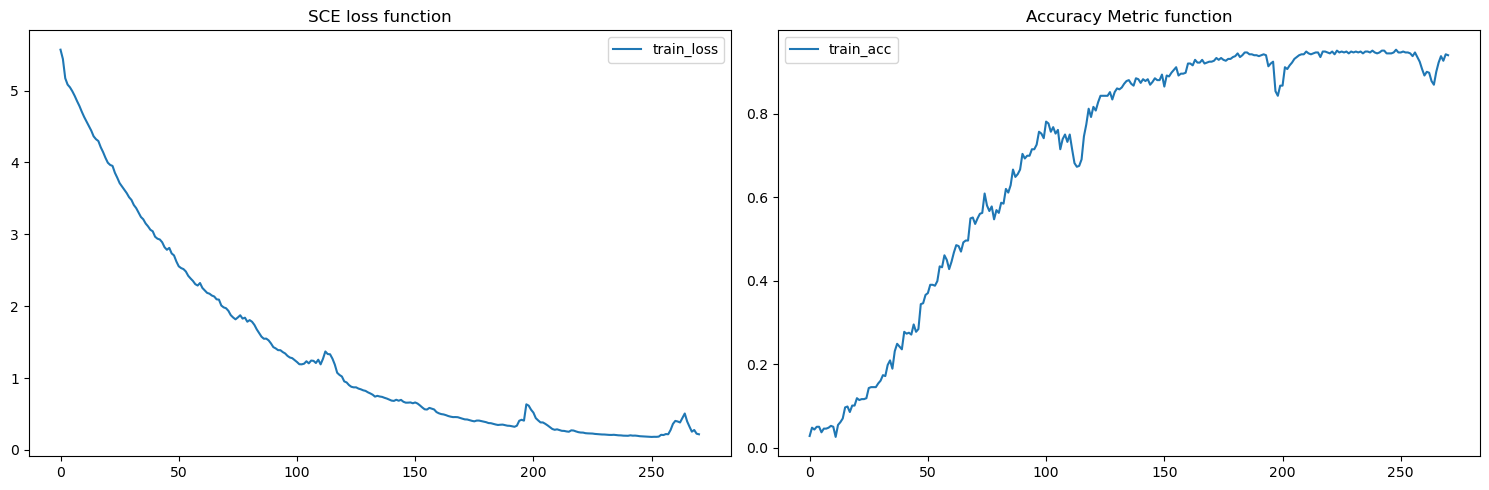

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(history.history['loss'], label="train_loss")
ax[0].set_title("SCE loss function")
ax[0].legend()

ax[1].plot(history.history['accuracy'], label="train_acc")
ax[1].set_title("Accuracy Metric function")
ax[1].legend()
plt.tight_layout()
plt.show()

### Text Generation

In [29]:
# Define seed text
seed_text = "Laurence went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):


  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=MAX_LENGTH-1, padding='pre')

# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1, 2, 3])

  # Sort the probabilities in ascending order
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

# Ignore if index is 0 because that is just the padding.
  if predicted != 0:    
	  # Look up the word associated with the index.
	  output_word = tokenizer.index_word[predicted]
	  # Combine with the seed text
	  seed_text += " " + output_word

# Print the result
print(seed_text)

1/1 [==============================] - 0s 43ms/step
Laurence went to Dublin in couples to and boys i ladies might ask ladies jig might ask ask suppose suppose might ask ladies might ask glisten able able able rose rose rose ladies might ask jig might hall cask might rose rose rose rose ladies rose ladies rose might eyes ladies ladies might rose jig rose rose rose ladies might ask glisten rose ladies might hall jig rose jig ladies ladies rose might fall ask suppose ladies ladies rose ladies ladies ladies rose might ask cask ladies ladies rose rose might ask ladies jig suppose suppose ladies might ask rose ladies ladies rose rose


### Post training quantization

##### Save the model

In [32]:
model.save("./saved_model/")

INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets


##### NO Quantization

In [34]:
import tensorflow as tf
# converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model/")
# tflite_model = converter.convert()


# Assuming you already have a SavedModel at "./saved_model/"
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model/")

# Disable the experimental lower tensor list ops
converter._experimental_lower_tensor_list_ops = False

# Set supported TF ops to include SELECT_TF_OPS
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

# Convert the model to TFLite format
tflite_model = converter.convert()

##### with Quantization

In [ ]:
# !pip install --user --upgrade tensorflow-model-optimization

In [37]:
import tensorflow as tf
# converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_quant_model = converter.convert()


converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")

# Disable the experimental lower tensor list ops
converter._experimental_lower_tensor_list_ops = False
# Set supported TF ops to include SELECT_TF_OPS
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

# Optimize for size
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model to TFLite format
tflite_quant_model = converter.convert()

In [38]:
len(tflite_model), len(tflite_quant_model)

(632800, 186752)

In [39]:
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

In [40]:
with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)

### Quantization aware training

In [43]:
import tensorflow_model_optimization as tfmot

In [ ]:
quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

q_aware_model.summary()

In [ ]:
q_aware_model.fit(xs, ys, epochs=1)